# This tutorial illustrates the usage of wnstatmech.

Begin by installing necessary packages.

In [1]:
import sys
!{sys.executable} -m pip install --quiet matplotlib
!{sys.executable} -m pip install --quiet numpy
#!{sys.executable} -m pip install --quiet wnstatmech

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wnstatmech as ws

Next, import the necessary packages:

Create an electron.  You can use the Fermion class, but here we will use the convenience routine for an electron.

In [3]:
electron = ws.fermion.create_electron()

Get the properties of the electron.  The rest mass is in MeV.  The multiplicity is usually twice the spin plus one.  The charge is in units of the fundamental charge.

In [4]:
for key, value in electron.get_properties().items():
    print(f"{key}:  {value}")

name:  electron
rest mass:  0.5109988947017501
multiplicity:  2
charge:  -1


Now compute the net electon number density for the chosen temperature (by default, $10^7$ K) and chemical potential less rest mass divided by kT (by default, $\mu'/kT = 5$.

Text(0, 0.5, 'n(x)')

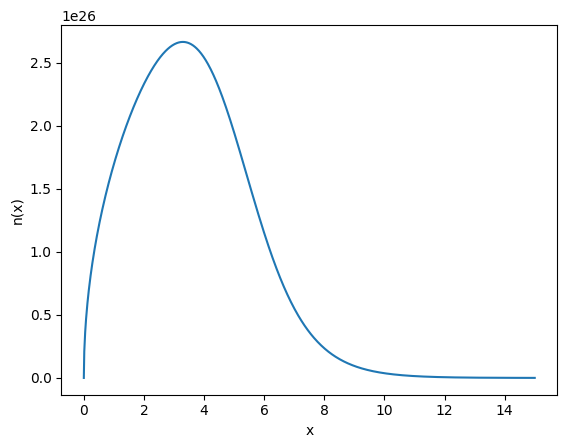

In [5]:
T = 1.e7
alpha = 5

x = np.linspace(0, 3 * alpha, 1000)
y = [electron.default_number_density_integrand(xx, T, alpha) for xx in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('n(x)')

Other integrands are available (*pressure*, *energy density*, *internal energy density*, *entropy density*).  Here plot the entropy density.

Text(0, 0.5, 's(x)')

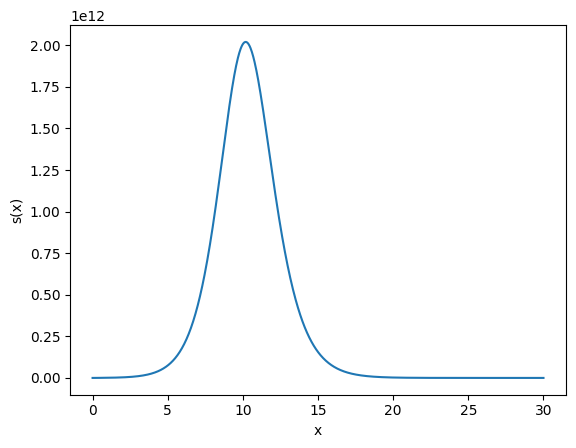

In [6]:
T = 1.e8
alpha = 10

x = np.linspace(0, 3 * alpha, 1000)
y = [electron.default_entropy_density_integrand(xx, T, alpha) for xx in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('s(x)')

We can now compute quantities.  First, compute the chemical potential as a function of number density for fixed temperature.

Text(0, 0.5, "$\\mu'/kT$")

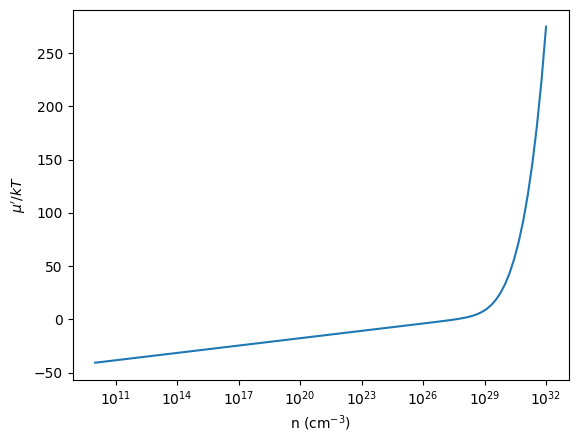

In [7]:
T = 1.e8
n = np.logspace(10, 32, 100)
mu_kT = [electron.compute_chemical_potential(T, nn) for nn in n]

plt.plot(n, mu_kT)
plt.xscale('log')
plt.xlabel("n (cm$^{-3}$)")
plt.ylabel("$\\mu'/kT$")

Now compute a quantity as a function of number density.  Other quantities are *energy density*, *internal energy density*, and *entropy density*.  Each of these quantities are computed from the temperature and appropriate chemical potential.

Text(0, 0.5, 'P (dynes / cm$^2$)')

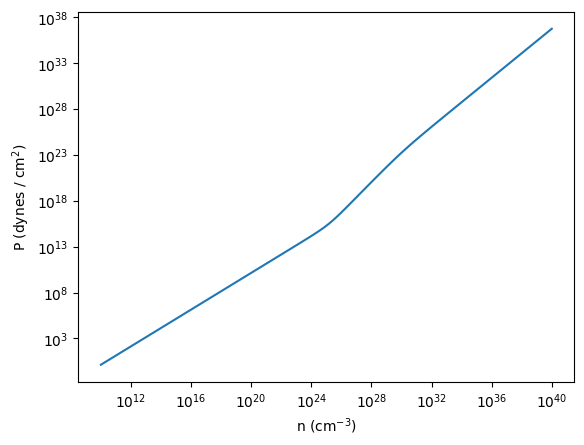

In [8]:
T = 1.e6
n = np.logspace(10, 40, 100)
pressure = [electron.compute_quantity("pressure", T, electron.compute_chemical_potential(T, nn)) for nn in n]

plt.plot(n, pressure)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("n (cm$^{-3}$)")
plt.ylabel("P (dynes / cm$^2$)")

Now create a neutron.  Here we need to provide the relevant data (rest mass energy in MeV, multiplicity, and charge).

In [9]:
neutron = ws.fermion.Fermion('neutron', 939.565, 2, 0)

Once the neutron is created, let's check the properties.

In [10]:
for key, value in neutron.get_properties().items():
    print(f"{key}:  {value}")

name:  neutron
rest mass:  939.565
multiplicity:  2
charge:  0


Next, plot an integrand.  By default, we'll plot the number density at T = $10^7$ K and $\mu/kT = -15$.

Text(0, 0.5, 'n(x)')

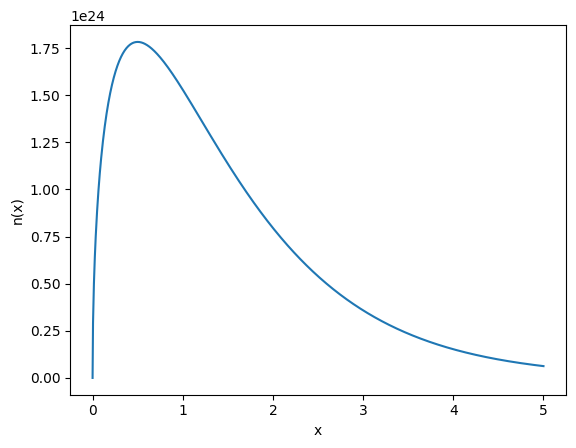

In [11]:
T = 1.e7
alpha = -15

x = np.linspace(0, 5, 1000)
y = [neutron.default_number_density_integrand(xx, T, alpha) for xx in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('n(x)')

Now compute a quantity as a function of temperature at constant number density.  For low temperature, the neutrons are degenerate and the pressure is independent of temperature.

Text(0, 0.5, 'P (dynes / cm$^2$)')

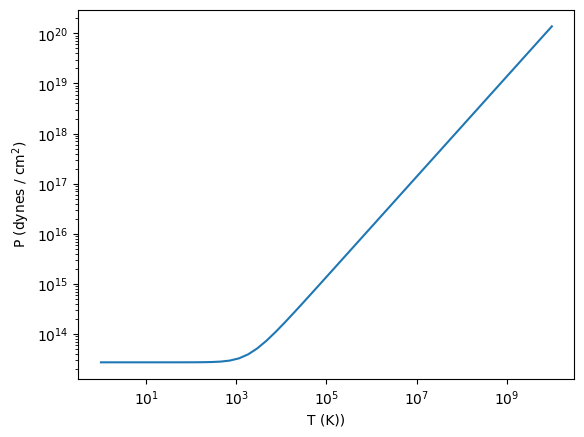

In [12]:
Ts = np.logspace(0, 10)
n = 1.e26
pressure = [neutron.compute_quantity("pressure", T, neutron.compute_chemical_potential(T, n)) for T in Ts]

plt.plot(Ts, pressure)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("T (K))")
plt.ylabel("P (dynes / cm$^2$)")

## Bosons